### Naive Bayes

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

In [7]:
iris.data[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris.target[:5,]

array([0, 0, 0, 0, 0])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
gnb = GaussianNB()

In [13]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [14]:
y_pred = gnb.predict(X_test)

In [15]:
y_pred

array([1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       1, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1,
       0])

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, y_pred)

0.9333333333333333

### Decision Trees

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt = DecisionTreeClassifier()

In [20]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
y_pred = dt.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [23]:
import graphviz
from sklearn.tree import export_graphviz

In [24]:
dot_data = export_graphviz(dt, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names)

In [25]:
graph = graphviz.Source(dot_data)

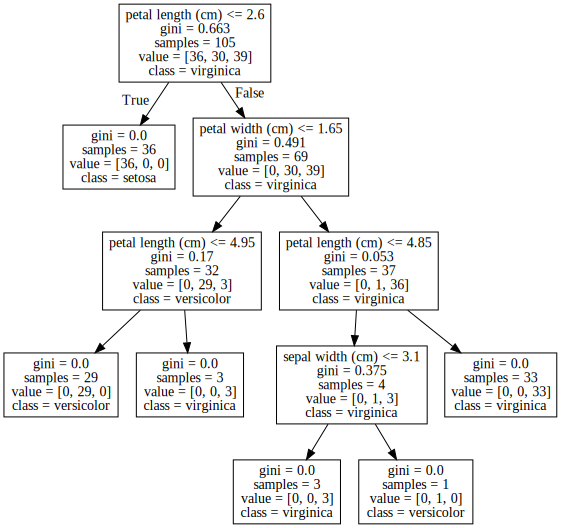

In [26]:
graph

### k-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
neigh = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [29]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
y_pred = neigh.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.9555555555555556

### Support Vector Machines

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC(kernel="linear")

In [34]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
y_pred = svc.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [37]:
# A simple function to visualize decision boundaries
x_min, x_max = iris.data[:, 0].min()-1, iris.data[:, 0].max()+1
y_min, y_max = iris.data[:, 1].min()-1, iris.data[:, 1].max()+1

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# precit and reshape
svc_linear = SVC(kernel="linear").fit(iris.data[:,0:2], iris.target)
svc_poly = SVC(kernel="poly").fit(iris.data[:,0:2], iris.target)
svc_rbf = SVC(kernel="rbf").fit(iris.data[:,0:2], iris.target)

In [40]:
def vis_svc(svc):
    # Return coordinate matrices from coordinate vectors
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5, 5))
    # plot contour
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    # plot training points
    plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap=plt.cm.coolwarm)
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')

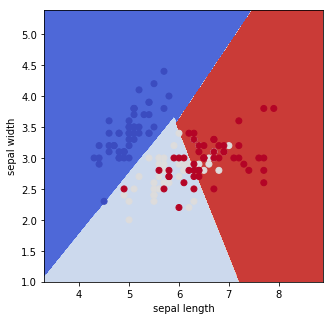

In [41]:
vis_svc(svc_linear)

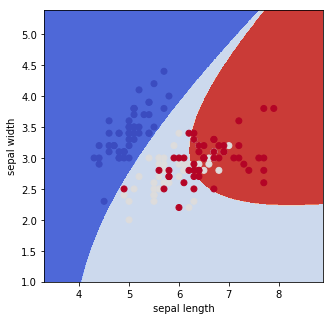

In [42]:
vis_svc(svc_poly)

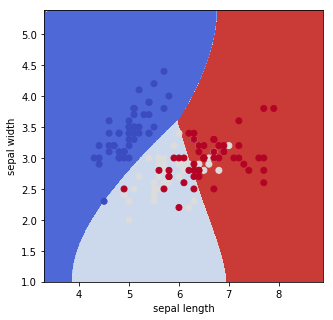

In [43]:
vis_svc(svc_rbf)